Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [0]:
%pylab inline  
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [0]:
df = pd.DataFrame.from_csv('data.csv')
df.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [0]:
df.dtypes

quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [0]:
df.index.nunique(), df.item_name.nunique()

(1834, 50)

In [0]:
len(df)

4622

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [0]:
df.isnull().any()

quantity              False
item_name             False
choice_description     True
item_price            False
dtype: bool

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [0]:
numcols = df.select_dtypes(include=[np.number]).columns
objcols = df.select_dtypes(include=[object]).columns
df[numcols] = df[numcols].fillna(0)
df[objcols] = df[objcols].fillna('')

In [0]:
df.select_dtypes(include=[object]).columns

Index(['item_name', 'choice_description', 'item_price'], dtype='object')

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [0]:
df['new_item_price'] = df.item_price.str.replace('$', '').replace(' ', '').astype(np.float)
df.dtypes

quantity                int64
item_name              object
choice_description     object
item_price             object
new_item_price        float64
dtype: object

Какая средняя/минимальная/максимальная цена у товара? 

In [0]:
df.new_item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: new_item_price, dtype: float64

Удалите старую колонку с ценой.

In [0]:
del df['item_price']

In [0]:
df.head(10)

,quantity,item_name,choice_description,new_item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
3,1,Side of Chips,NaN,1.69
4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [0]:
df['single_price'] = df['new_item_price'] / df['quantity']
df.groupby('item_name')['single_price'].max().sort_values(ascending=False).tail()

item_name
Chips                2.15
Side of Chips        1.69
Bottled Water        1.50
Canned Soft Drink    1.25
Canned Soda          1.09
Name: single_price, dtype: float64

#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [0]:
df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)].shape[0]

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [0]:
mean_sum = df.groupby('order_id')['new_item_price'].sum().mean()
mean_q = df.groupby('order_id')['quantity'].sum().mean()
mean_sum, mean_q

(18.81142857142869, 2.711014176663032)

#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [0]:
len(df[df.groupby(level=0).count()['quantity'] == 1])

/Users/legchikovdmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


128

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [0]:
df.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [0]:
df[df.item_name.str.contains('Burrito')].groupby('item_name')['single_price'].max().sort_values(ascending=False).head(1)
df[df.item_name.str.contains('Burrito')].groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)

item_name
Chicken Burrito    591
Name: quantity, dtype: int64

#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [0]:
mean_order_price = df.groupby('order_id')['new_item_price'].sum().mean()
df['40_proc'] = df.groupby('order_id')['new_item_price'].sum()*0.4
len(df[df['new_item_price'] > df['40_proc']])

2087

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [0]:
old_price, new_price = 1.25, 1.35

coke_old_sum = df[(df['choice_description'] == '[Diet Coke]') & (df['single_price'] == old_price)]['single_price'].sum()
df.loc[(df['choice_description'] == '[Diet Coke]') & (df['single_price'] == old_price), 'single_price'] = new_price
df['new_item_price'] = df['single_price'] * df['quantity']
coke_new_sum = df[(df['choice_description'] == '[Diet Coke]') & (df['single_price'] == new_price)]['single_price'].sum()
np.abs(coke_old_sum - coke_new_sum)


9.4999999999997726

#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [0]:
data = np.random.rand(10, 3)
df = pd.DataFrame(data, columns=['index', 'column1', 'column2']).set_index('index')
df.head()

,column1,column2
index,,
0.602958,0.501169,0.544516
0.774901,0.945121,0.284333
0.435739,0.312644,0.954706
0.581652,0.035775,0.930085
0.625036,0.548549,0.072357


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [0]:
df.to_csv('df.csv', header=False, index=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [0]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.index.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.index.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = dates['date']

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

In [0]:
df.head()

,quantity,item_name,choice_description,new_item_price,single_price,date
order_id,,,,,,
1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-06
1,1,Izze,[Clementine],3.39,3.39,2018-01-06
1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-06
1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-06
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2018-01-15


#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

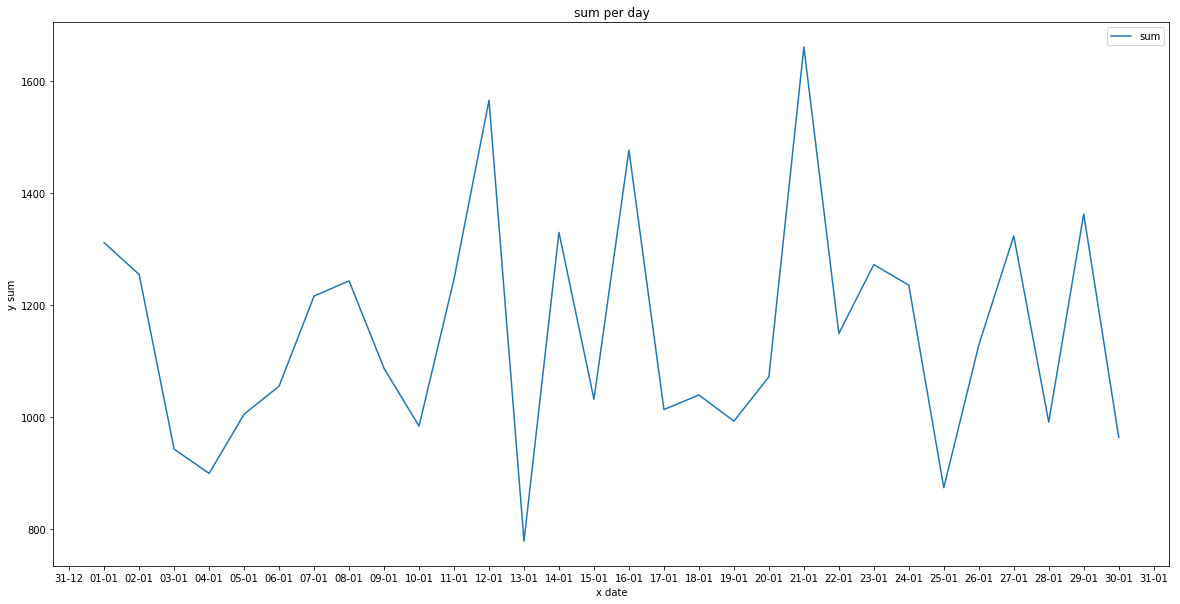

In [0]:
import matplotlib.dates as mdates


ts = df.groupby('date').sum()['new_item_price']
ts.index = pd.to_datetime(ts.index)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

days = mdates.DayLocator(interval=1) 
fmt = mdates.DateFormatter('%d-%m')

ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(days)

ax.plot(ts, label='sum')

ax.set_xlabel('x date')
ax.set_ylabel('y sum')
ax.set_title("sum per day")
ax.legend()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

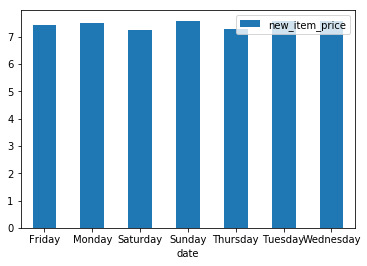

In [0]:
week_df = df.groupby(df.date.dt.weekday_name).mean()['new_item_price']
wdf = pd.DataFrame(week_df)
wdf.plot.bar(rot=0)

# df['date'] = pd.to_datetime(df['date'])

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

Text(0,0.5,'single_price')

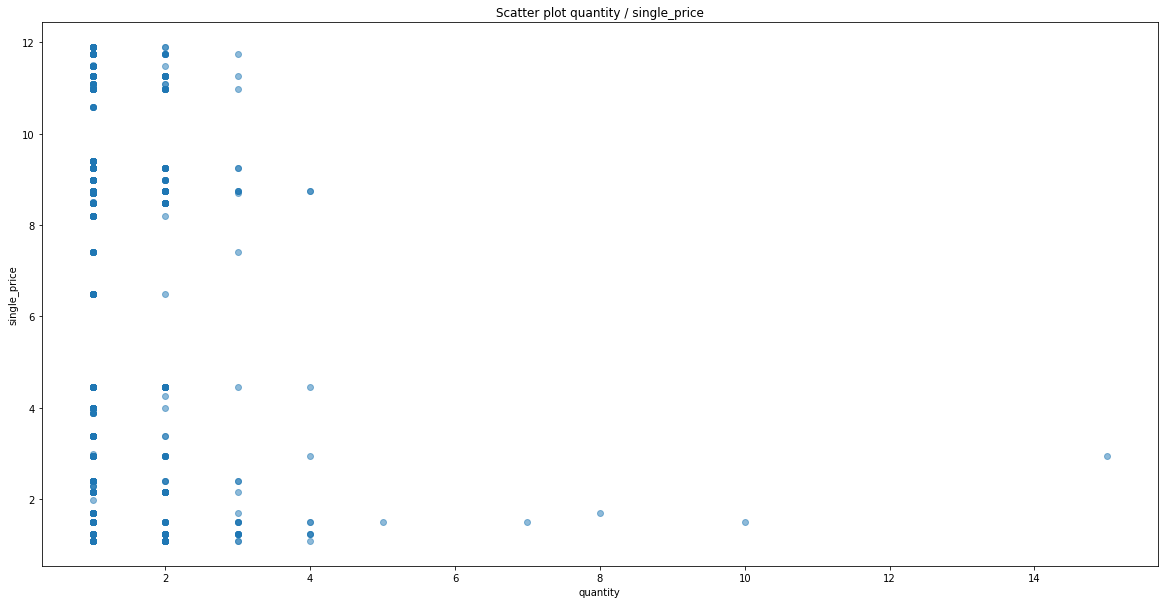

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

plt.scatter(df['quantity'], df['single_price'], alpha=0.5)
plt.title('Scatter plot quantity / single_price')
plt.xlabel('quantity')
plt.ylabel('single_price')

Сохраните график в формате pdf (так он останется векторизованным).

In [0]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('foo.pdf')
pp.savefig(fig)
pp.close()

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 